# TensorFlow Neural Network - Fashion MNIST

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# 10 different fashion items
num_classes = 10
# Size of batch and no. epochs
batch_size = 64
epochs = 24
# Image dimensions
img_rows, img_cols = 28, 28

## Load train and test data

In [ ]:
# Load data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Get no. unique values from train set
unique_values, counts = np.unique(y_train, return_counts=True)
unique_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Get no. unique values from test set
unique_values, counts = np.unique(y_test, return_counts=True)
unique_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

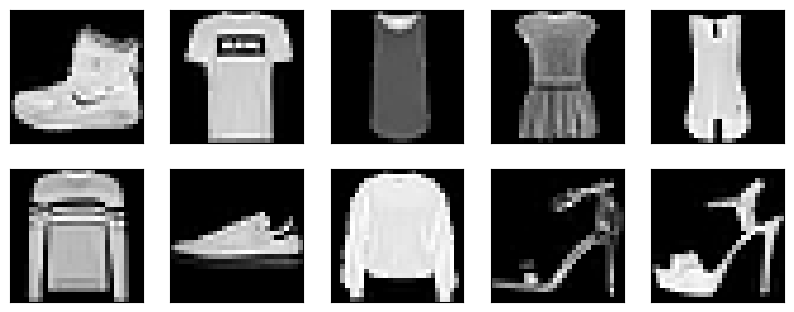

In [ ]:
# Reshape data to view images
X_train_reshape = X_train.reshape(-1,28,28)
X_test_reshape = X_test.reshape(-1,28,28)
# Preview images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i], cmap="gray")
plt.show()

## Transform data

In [ ]:
X_train.shape[0]

60000

In [ ]:
# Reshape train and test sets
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# Convert data types for train and test data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
# Scale train and test data
X_train /= 255.
X_test /= 255.

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

X_train shape: (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Reshape to (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)    # Reshape to (10000, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_train[:100]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8], dtype=uint8)

In [ ]:
# Convert labels (0 to 9) to binary class matrices with one-hot encoding
# e.g. 9 => 0 0 0 0 0 0 0 0 0 1 and 3 => 0 0 0 1 0 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train[0:4])   # verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Artificial Neural Network (ANN)

In [ ]:
# Initialise the model
classifier = Sequential()

We saw the shape of X_train is 60000 x 28 x 28 x 1.

There are 60,000 observations. The dimensions of the input are 28x28x1, where 1 is the colour dimension: the images are in greyscale.

28 x 28 = 784.

The output dimension will be 10, one for each class.

784 + 10 = 794 -> 794 / 2 = 397 -> I will try with 400 hidden units.

In [ ]:
# Input layer and first hidden layer
classifier.add(Dense(units=128, kernel_initializer="uniform", activation="relu", input_dim=784))
# Second hidden layer
classifier.add(Dense(units=256, kernel_initializer="uniform", activation="relu"))
# Third  hidden layer
classifier.add(Dense(units=128, kernel_initializer="uniform", activation="relu"))
# Output layer - softmax
classifier.add(Dense(units=10, kernel_initializer="uniform", activation="softmax"))

In [ ]:
# Compile the ANN
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

The training set has 60,000 observations.

With batch size of 1,000, epochs = 60.

In [ ]:
# Fit the ANN to the training set
classifier.fit(X_train, y_train, batch_size=1000, epochs=100)

Epoch 1/100


60/60 [==============================] - 2s 10ms/step - loss: 1.1925 - accuracy: 0.5677
Epoch 2/100
60/60 [==============================] - 1s 9ms/step - loss: 0.6084 - accuracy: 0.7795
Epoch 3/100
60/60 [==============================] - 1s 9ms/step - loss: 0.5007 - accuracy: 0.8244
Epoch 4/100
60/60 [==============================] - 1s 9ms/step - loss: 0.4560 - accuracy: 0.8377
Epoch 5/100
60/60 [==============================] - 1s 9ms/step - loss: 0.4243 - accuracy: 0.8483
Epoch 6/100
60/60 [==============================] - 1s 10ms/step - loss: 0.3997 - accuracy: 0.8565
Epoch 7/100
60/60 [==============================] - 1s 9ms/step - loss: 0.3821 - accuracy: 0.8630
Epoch 8/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3626 - accuracy: 0.8692
Epoch 9/100
60/60 [==============================] - 1s 13ms/step - loss: 0.3523 - accuracy: 0.8716
Epoch 10/100
60/60 [==============================] - 1s 10ms/step - loss: 0.3381 - accuracy: 0.8759
Ep

## Test the model

In [ ]:
y_pred = classifier.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[0]

array([3.2507458e-14, 8.0840501e-11, 3.5092576e-12, 1.1590582e-14,
       2.4341644e-16, 6.5226882e-09, 1.1467059e-12, 2.5377128e-06,
       1.0795327e-11, 9.9999750e-01], dtype=float32)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to class indices
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.2%}\n")
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 88.76%

Confusion Matrix:
[[880   2  16  16   7   0  70   0   8   1]
 [  5 979   2   9   4   0   1   0   0   0]
 [ 28   2 803  10  89   1  66   0   1   0]
 [ 38   8  11 865  47   1  27   0   3   0]
 [  2   0  82  19 833   0  64   0   0   0]
 [  0   0   0   0   0 961   0  20   4  15]
 [156   0  68  20  68   0 681   0   7   0]
 [  0   0   0   0   0  12   0 958   0  30]
 [ 11   1   3   4  12   4   4   2 958   1]
 [  0   0   0   0   0  12   1  29   0 958]]


In [ ]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 167690 (655.04 KB)
Trainable params: 167690 (655.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
